**SERGIO RODRIGUEZ BAUTISTA - SANDY ATENCIO HERNANDEZ**

In [2]:
#SE IMPORTAN LIBRERIAS
import sklearn.linear_model as lm;
import sklearn.model_selection as ms;
from   sklearn.preprocessing import StandardScaler;
import matplotlib.pyplot as plt;
import pandas as pd;
import numpy as np;
import seaborn as sns;
from   statistics import mode, StatisticsError;
import warnings;
from   sklearn.metrics import confusion_matrix;
from   sklearn.exceptions import DataConversionWarning;
warnings.filterwarnings(action='ignore', category=DataConversionWarning);

In [3]:
#SE CARGA EL DATASET " Blood Transfusion Service Center "
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/blood-transfusion/transfusion.data', delimiter=',', decimal='.');
datos = pd.DataFrame(data);

**1. Describa el dataset.**

In [4]:
#DESCRIPCIÓN DEL DATASET 
print('Descripción del dataset: \n\n', datos.describe(include='all'), '\n');

Descripción del dataset: 

        Recency (months)  Frequency (times)  Monetary (c.c. blood)  \
count        748.000000         748.000000             748.000000   
mean           9.506684           5.514706            1378.676471   
std            8.095396           5.839307            1459.826781   
min            0.000000           1.000000             250.000000   
25%            2.750000           2.000000             500.000000   
50%            7.000000           4.000000            1000.000000   
75%           14.000000           7.000000            1750.000000   
max           74.000000          50.000000           12500.000000   

       Time (months)  whether he/she donated blood in March 2007  
count     748.000000                                  748.000000  
mean       34.282086                                    0.237968  
std        24.376714                                    0.426124  
min         2.000000                                    0.000000  
25%        16.0

**CREADOR**:
Karl Ulrich

**INFO**:

Para demostrar el modelo de comercialización RFMTC (una versión modificada de RFM), este estudio adoptó la base de datos de donantes del Centro de Servicios de Transfusión de Sangre en la ciudad de Hsin-Chu en Taiwán. El centro pasa su autobús del servicio de transfusión de sangre a una universidad en la ciudad de Hsin-Chu para recolectar sangre donada cada tres meses aproximadamente. Para construir un modelo FRMTC, seleccionamos 748 donantes al azar de la base de datos de donantes. Estos 748 datos de donantes, cada uno incluye R (Recency - meses desde la última donación), F (Frecuencia - número total de donaciones), M (Monetary - sangre total donada en cc), T (Tiempo - meses desde la primera donación), y una variable binaria que representa si donó sangre en marzo de 2007 (1 significa donar sangre; 0 significa no donar sangre).

**ATRIBUTOS**:

1. R (Recency - meses desde la última donación) 
2. F (Frecuencia - número total de donaciones) 
3. M (Monetary - sangre total donada en cc) 
4. T (Tiempo - meses desde la primera donación)
5. Variable binaria que representa si él / ella sangre donada en marzo de 2007 (1 significa donar sangre; 0 significa no donar sangre). 


**2. Calcule, para las variables numericas, las medidas de tendencia central (media, moda, mediana) y la desviacion estandar. En caso de no ser necesario explique las razones**

In [5]:
Meses             = datos["Recency (months)"];
NDonaciones       = datos["Frequency (times)"];
SDonada           = datos["Monetary (c.c. blood)"];
MesPrimerDonacion = datos["Time (months)"];
Donar             = datos["whether he/she donated blood in March 2007"];

print('\n\nMEDIA, MODA, MEDIANA, DESVIACIÓN ESTANDAR: \n');

print("\nMeses desde la última donación\n");
print("Media: "   + str(  Meses.mean()   ) );
try:
    print('Moda: ', mode(Meses));
except StatisticsError:
    print('Moda: ','No hay una unica moda encontrada');
print("Mediana: " + str(  Meses.median() ) );
print("Desviación estándar: " + str(  Meses.std() ) );


print("\nNúmero total de donaciones\n");
print("Media: "   + str(  NDonaciones.mean()   ) );
try:
    print('Moda: ', mode(NDonaciones));
except StatisticsError:
    print('Moda: ','No hay una unica moda encontrada');
print("Mediana: " + str(  NDonaciones.median() ) );
print("Desviación estándar: " + str(  NDonaciones.std() ) );


print("\nSangre total donada en cc\n");
print("Media: "   + str(  SDonada.mean()   ) );
try:
    print('Moda: ', mode(SDonada));
except StatisticsError:
    print('Moda: ','No hay una unica moda encontrada');
print("Mediana: " + str(  SDonada.median() ) );
print("Desviación estándar: " + str(  SDonada.std() ) );


print("\nMeses desde la primera donación\n");
print("Media: "   + str(  MesPrimerDonacion.mean()   ) );
try:
    print('Moda: ', mode(MesPrimerDonacion));
except StatisticsError:
    print('Moda: ','No hay una unica moda encontrada');
print("Mediana: " + str(  MesPrimerDonacion.median() ) );
print("Desviación estándar: " + str(  MesPrimerDonacion.std() ) );


print("\nSangre donada en marzo de 2007\n");
print("Media: "   + str(  Donar.mean()   ) );
try:
    print('Moda: ', mode(Donar));
except StatisticsError:
    print('Moda: ','No hay una unica moda encontrada');
print("Mediana: " + str(  Donar.median() ) );
print("Desviación estándar: " + str(  Donar.std() ) );



MEDIA, MODA, MEDIANA, DESVIACIÓN ESTANDAR: 


Meses desde la última donación

Media: 9.506684491978609
Moda:  2
Mediana: 7.0
Desviación estándar: 8.095395635299203

Número total de donaciones

Media: 5.514705882352941
Moda:  1
Mediana: 4.0
Desviación estándar: 5.839307123090031

Sangre total donada en cc

Media: 1378.6764705882354
Moda:  250
Mediana: 1000.0
Desviación estándar: 1459.826780772503

Meses desde la primera donación

Media: 34.282085561497325
Moda:  4
Mediana: 28.0
Desviación estándar: 24.376714368614156

Sangre donada en marzo de 2007

Media: 0.23796791443850268
Moda:  0
Mediana: 0.0
Desviación estándar: 0.42612432780145154


**3. Grafique el dataset**


VARIABLE DEPENDIENTE:



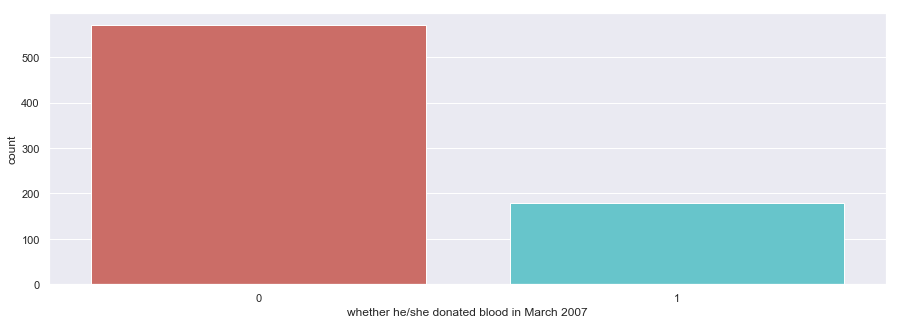


NUMERO DE MESES DESDE LA ULTIMA DONACION:



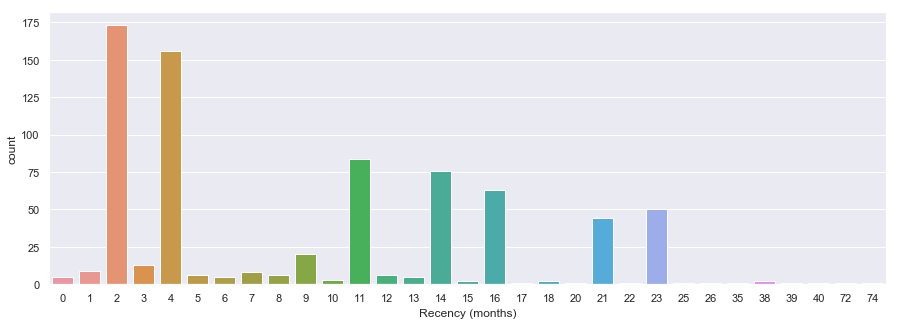


NUMERO DE DONACIONES REALIZADAS:



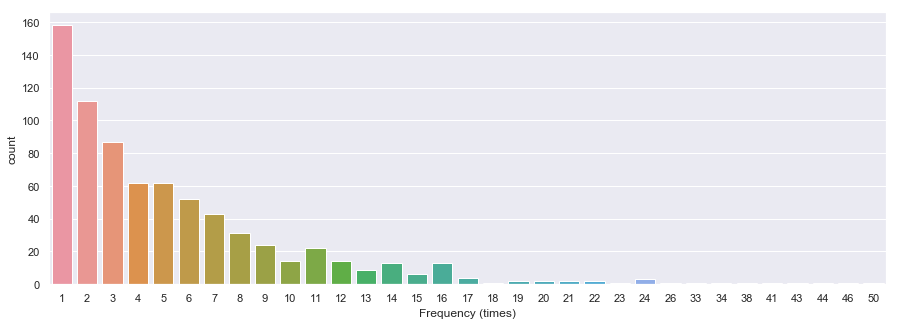


SANGRE DONADA:



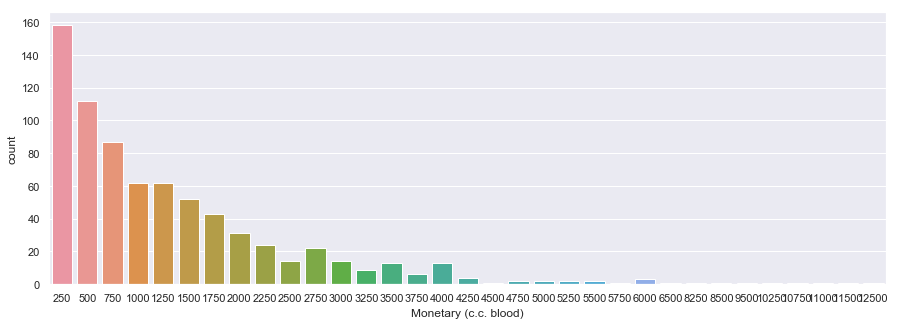


NUMERO DE MESES DESDE LA PRIMER DONACION:



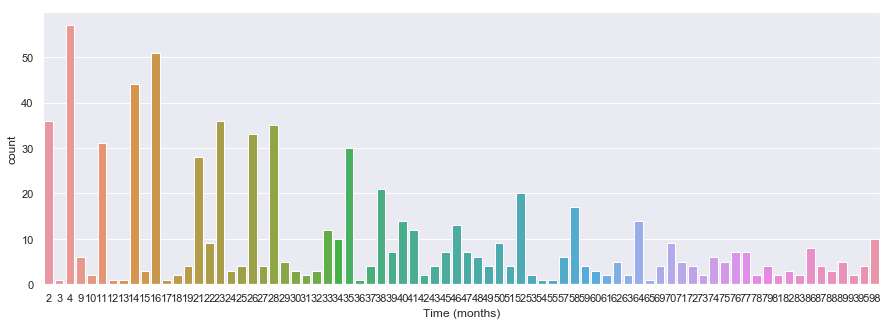

In [6]:
#SE REDIMENCIONA LA FIGURA PARA EL GRAFICO
sns.set( rc={'figure.figsize':(15,5)} );

##### SE VISUALIZAN LOS DATOS #####

#VARIABLE DEPENDIENTE
print("\nVARIABLE DEPENDIENTE:\n");
sns.countplot(x=Donar, data=datos, palette='hls');
plt.show();

#MES DESDE LA ULTIMA DONACION
print("\nNUMERO DE MESES DESDE LA ULTIMA DONACION:\n");
sns.countplot(x=Meses, data=datos)
plt.show()

#NUMERO DE DONACIONES REALIZADAS
print("\nNUMERO DE DONACIONES REALIZADAS:\n");
sns.countplot(x=NDonaciones, data=datos)
plt.show()

#SANGRE DONADA
print("\nSANGRE DONADA:\n");
sns.countplot(x=SDonada, data=datos)
plt.show()

#NUMERO DE MESES DESDE LA PRIMER DONACION
print("\nNUMERO DE MESES DESDE LA PRIMER DONACION:\n");
sns.countplot(x=MesPrimerDonacion, data=datos)
plt.show()



**4. Entrene un modelo de clasificacion con regresion logıstica variando la proporcion existente entre los datos de
entrenamiento y los datos de prueba.**

In [7]:
#DATOS SE SELECCIONA EL NUMERO TOTAL DE DONACIONES Y LA CANTIDAD DE SANGRE DONADA
X = datos.iloc[:,1:3];
#DATOS OBJETIVO
Y = datos.iloc[:,4]

In [8]:
#SE ENTRENA EL PRIMER MODELO  CON UN 20%  DE VERIFICACIÓN
X_train1, X_test1, Y_train1, Y_test1 = ms.train_test_split(X, Y, test_size = 0.2);
#SE REALIZA UN AJUSTE DE ESCALAS
sc = StandardScaler();
X_train1  = sc.fit_transform(X_train1);
X_test1   = sc.transform(X_test1);
#SE INICIALIZA LA REGRESION LOGISTICA
logReg1 = lm.LogisticRegression(solver='lbfgs', random_state = 0);
#SE ENTRENA EL MODELO
logReg1.fit(X_train1, Y_train1);
#SE OBTIENE LA PREDICCION
y_pred1 = logReg1.predict(X_test1);
#SE CREA LA MATRIZ DE CONFUSION
cm1 = confusion_matrix(Y_test1, y_pred1);
#SE MUESTRA LA MATRIZ
print("\nMATRIZ DE CONFUSION MODELO 20%:\n")
print(cm1);


MATRIZ DE CONFUSION MODELO 20%:

[[114   1]
 [ 32   3]]


In [9]:
#SE ENTRENA EL SEGUNDO MODELO  CON UN 25%  DE VERIFICACIÓN
X_train2, X_test2, Y_train2, Y_test2 = ms.train_test_split(X, Y, test_size = 0.25);
#SE REALIZA UN AJUSTE DE ESCALAS
sc = StandardScaler();
X_train2  = sc.fit_transform(X_train2);
X_test2   = sc.transform(X_test2);
#SE INICIALIZA LA REGRESION LOGISTICA
logReg2 = lm.LogisticRegression(solver='lbfgs', random_state = 0);
#SE ENTRENA EL MODELO
logReg2.fit(X_train2, Y_train2);
#SE OBTIENE LA PREDICCION
y_pred2 = logReg2.predict(X_test2);
#SE CREA LA MATRIZ DE CONFUSION
cm2 = confusion_matrix(Y_test2, y_pred2);
#SE MUESTRA LA MATRIZ
print("\nMATRIZ DE CONFUSION MODELO 25%:\n")
print(cm2);



MATRIZ DE CONFUSION MODELO 25%:

[[140   2]
 [ 42   3]]


In [10]:
#SE ENTRENA EL TERCER MODELO  CON UN 30%  DE VERIFICACIÓN
X_train3, X_test3, Y_train3, Y_test3 = ms.train_test_split(X, Y, test_size = 0.30);
#SE REALIZA UN AJUSTE DE ESCALAS
sc = StandardScaler();
X_train3  = sc.fit_transform(X_train3);
X_test3   = sc.transform(X_test3);
#SE INICIALIZA LA REGRESION LOGISTICA
logReg3 = lm.LogisticRegression(solver='lbfgs', random_state = 0);
#SE ENTRENA EL MODELO
logReg3.fit(X_train3, Y_train3);
#SE OBTIENE LA PREDICCION
y_pred3 = logReg3.predict(X_test3);
#SE CREA LA MATRIZ DE CONFUSION
cm3 = confusion_matrix(Y_test3, y_pred3);
#SE MUESTRA LA MATRIZ 
print("\nMATRIZ DE CONFUSION MODELO 30%:\n")
print(cm3);


MATRIZ DE CONFUSION MODELO 30%:

[[166   2]
 [ 55   2]]


**5. Evalúe la efectividad de cada uno de los modelos.**

In [11]:
efectividadModelo1 = logReg1.score(X_test1, Y_test1);
efectividadModelo2 = logReg2.score(X_test2, Y_test2);
efectividadModelo3 = logReg3.score(X_test3, Y_test3);

print("\nEfectividad del modelo con un 20% de datos de prueba: " + str( efectividadModelo1 ) );
print("Efectividad del modelo con un 25% de datos de prueba: " +   str( efectividadModelo2 ) );
print("Efectividad del modelo con un 30% de datos de prueba: " +   str( efectividadModelo3 ) );


Efectividad del modelo con un 20% de datos de prueba: 0.78
Efectividad del modelo con un 25% de datos de prueba: 0.7647058823529411
Efectividad del modelo con un 30% de datos de prueba: 0.7466666666666667


**6. Construya una gráfica que relaciona la cantidad de datos usados para el entrenamiento con la efectividad obtenida para el modelo y describa sus hallazgos.**

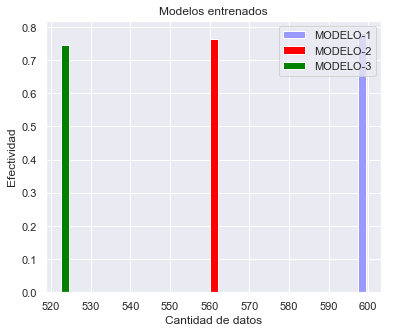

In [14]:
#SE CALCULA LA CANTIDAD DE DATOS USADOS PARA EL PRIMER MODELO
cantidadDatos1erModelo = len(X.index) - (len(X.index)*20)/100;
#SE CALCULA LA CANTIDAD DE DATOS USADOS PARA EL SEGUNDO MODELO
cantidadDatos2doModelo = len(X.index) - (len(X.index)*25)/100;
#SE CALCULA LA CANTIDAD DE DATOS USADOS PARA EL TERCER MODELO
cantidadDatos3erModelo = len(X.index) - (len(X.index)*30)/100;

# configurando el tamaño de la figura
plt.figure( figsize=(6, 5) );

plt.bar(cantidadDatos1erModelo, efectividadModelo1, facecolor='#9999ff', edgecolor='white',width=2, label='MODELO-1' );
plt.bar(cantidadDatos2doModelo, efectividadModelo2, facecolor='red', edgecolor='white',width=2, label='MODELO-2');
plt.bar(cantidadDatos3erModelo, efectividadModelo3, facecolor='green', edgecolor='white',width=2, label='MODELO-3');

plt.title('Modelos entrenados');
plt.xlabel('Cantidad de datos');
plt.ylabel('Efectividad');
plt.legend(loc='best')
plt.show();

**Como hallazgo se puede ver que el modelo de regresion logistica da muy buenos resultados con el dataset elegido llegando hasta un 78% de efectividad con uno de los modelos de entrenamiento, por otra parte el modelo que obtubo la mayor efectividad mostro  una matriz de confusion de 117 datos de prueba correctos y 33 incorrectos.**
